In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#import datset
comp_df_input = pd.read_csv("Company_Data.csv")
comp_df_input.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA

In [75]:
#Creating categorical target column based on the sales, if sales > 5 then it cosidered as high, remaining values as low
comp_df = comp_df_input.copy()
comp_df ["Sales"] = ["low" if Sales <= 6 else "high" 
                                 for Sales in comp_df["Sales"]]                                 

In [76]:
# Check for any null values
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    object
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [77]:
#check for duplicate rows
comp_df[comp_df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [78]:
#Descriptive statitics
comp_df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


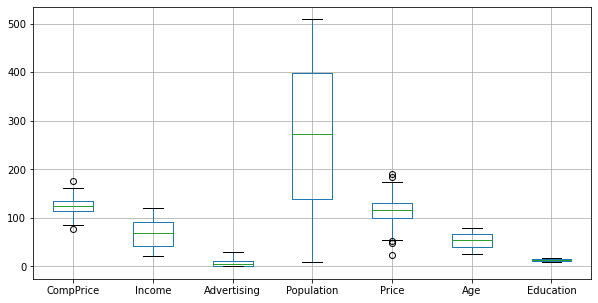

In [79]:
#Boxplot
comp_df.boxplot(figsize=(10,5));

In [80]:
#Deleteing outliers
comp_df_eda = comp_df.drop(comp_df[comp_df["CompPrice"] > 170].index, axis=0)
comp_df_eda = comp_df_eda.drop(comp_df_eda[comp_df_eda["Price"] > 180].index, axis=0)
comp_df_eda = comp_df_eda.drop(comp_df_eda[comp_df_eda["Price"] < 25].index, axis=0)
comp_df_eda.reset_index(inplace=True, drop=True)

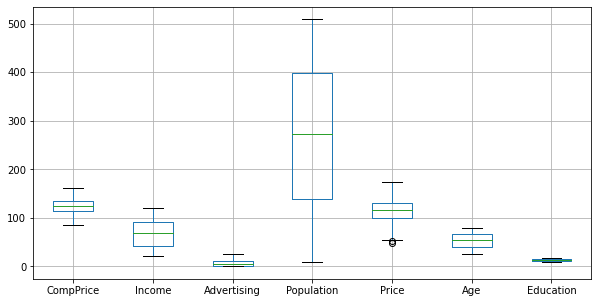

In [81]:
#Boxplot after oulier removal
comp_df_eda.boxplot(figsize=(10,5));

In [82]:
#Independet variable set 
x = pd.get_dummies(comp_df_eda.iloc[:,1:])

In [83]:
# Dependent variable 
label = LabelEncoder()
y = pd.DataFrame(label.fit_transform(comp_df_eda["Sales"]), columns=["Sales"])

In [84]:
# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## Model

In [95]:
# Modelbuilding
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [98]:
#model score on train data
round(model.score(x_train, y_train),3)

0.823

In [99]:
# Model score on test data
model.score(x_test,y_test)

0.825

In [100]:
cls_name = ["High Sales","Low Sales"]
plt.figure(figsize=(20,20),dpi=500)
tree.plot_tree(model, filled=True, feature_names=x.columns, class_names=cls_name);

### ShelveLoc with attribute medium and Good, Low Price driving high sales.